In [1]:
from xml.dom import minidom
from imutils import paths
import numpy as np
import shutil
import json
import cv2
import os

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_dir(dirName):
    # Create a target directory & all intermediate 
    # directories if they don't exists
    
    if not os.path.exists(dirName):
        os.makedirs(dirName, exist_ok = True)
        print("[INFO] Directory " ,dirName,  " created")
    else:
        print("[INFO] Directory " ,dirName,  " already exists") 

In [3]:
# Get paths to images and xml labels
DATASET = "/workspace/original-external/tj"
imagesList = sorted(list(paths.list_images(DATASET)))
labelsList = sorted(list(paths.list_files(DATASET, validExts='xml')))
len(imagesList), len(labelsList)

(343, 343)

In [4]:
def show_image(i):
    
    # Get the filename
    file = minidom.parse(labelsList[i])    
    filename = file.getElementsByTagName('filename')[0].firstChild.data

    # Get width and height
    h = int(file.getElementsByTagName('height')[0].firstChild.data)
    w = int(file.getElementsByTagName('width')[0].firstChild.data)

    # Read, resize and display the image
    imageName = imagesList[i]
    image = cv2.imread(imageName)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (w,h))

    plt.figure(figsize=(12, 8), dpi=80)
    plt.imshow(image)

    # Get the number of faces
    n = len(file.getElementsByTagName('object'))
    print(n)
    
    # Extract bounding box coordinates and display
    for i in range(n):
        xs = int(file.getElementsByTagName('xmin')[i].childNodes[0].data)
        ys = int(file.getElementsByTagName('ymin')[i].childNodes[0].data)
        xe = int(file.getElementsByTagName('xmax')[i].childNodes[0].data)
        ye = int(file.getElementsByTagName('ymax')[i].childNodes[0].data)
        
        ax = plt.gca()
        rect = patches.Rectangle((xs, ys), xe-xs, ye-ys, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)

1


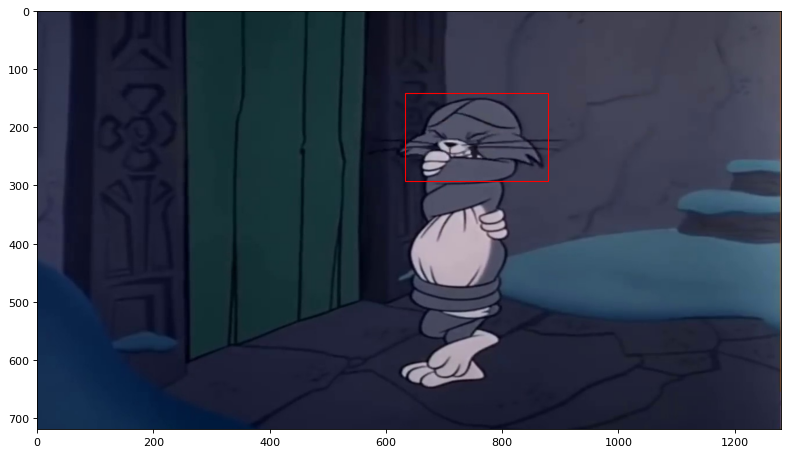

In [5]:
show_image(1)

1


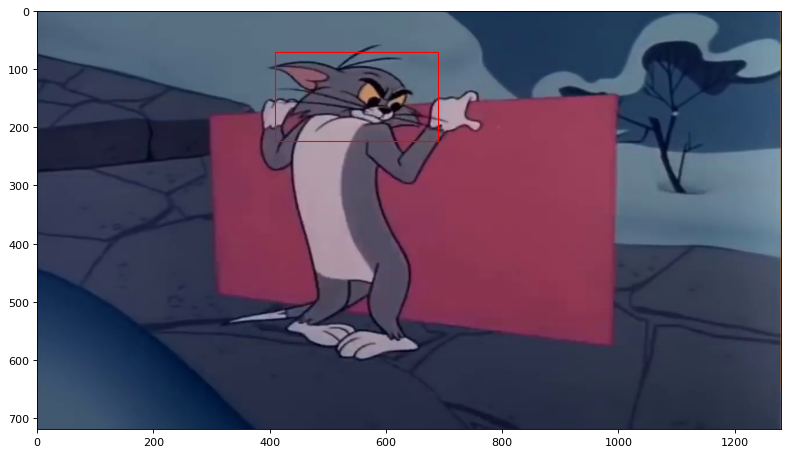

In [6]:
show_image(6)

1


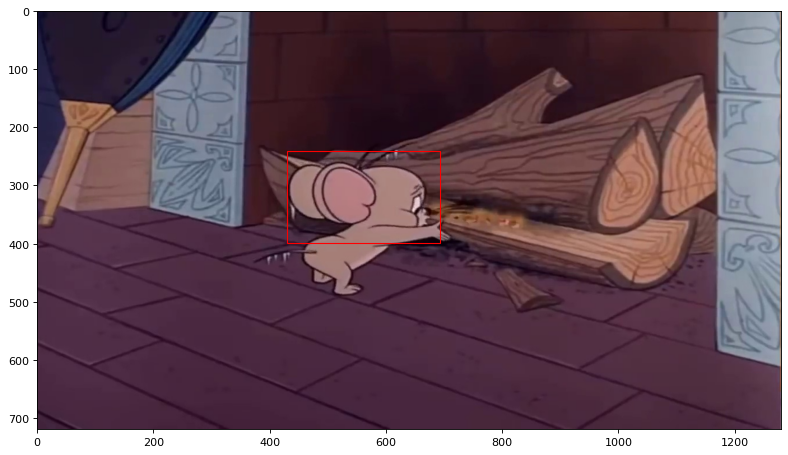

In [7]:
show_image(11)

1


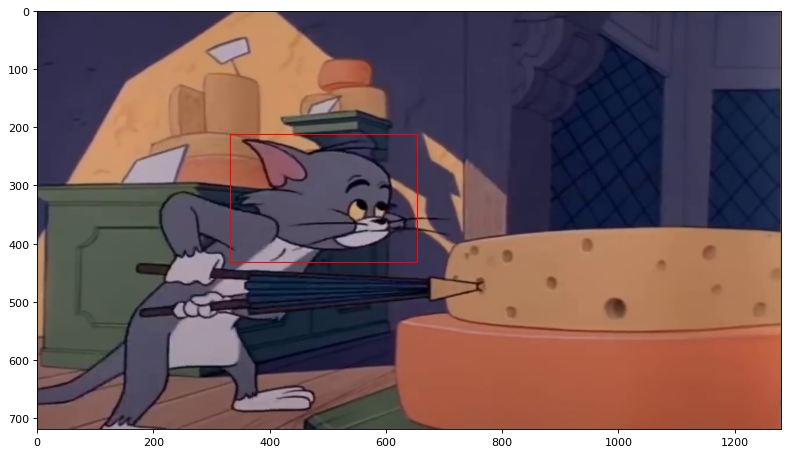

In [8]:
show_image(100)

1


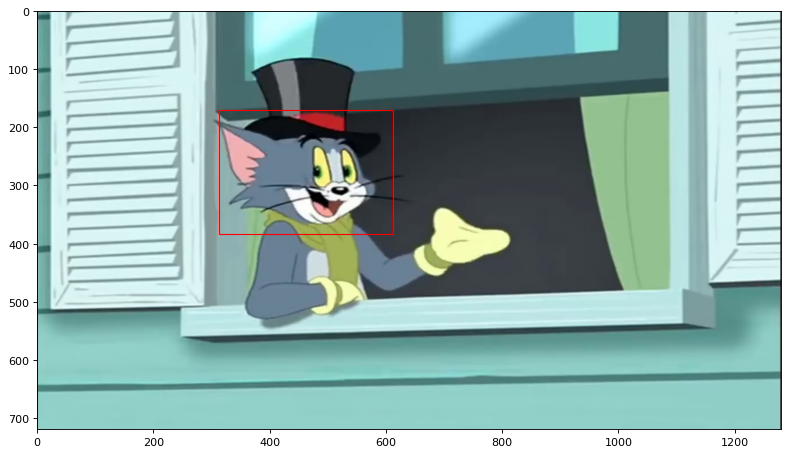

In [9]:
show_image(45)

In [11]:
# Create new directories for images and labels
NEW_DATASET = "/workspace/dataset/tj"
make_dir(os.path.join(NEW_DATASET, 'images'))
make_dir(os.path.join(NEW_DATASET, 'labels_eval'))

[INFO] Directory  /workspace/dataset-test/tj/images  created
[INFO] Directory  /workspace/dataset-test/tj/labels_eval  created


In [12]:
j = 1
for labelPath in labelsList:
    print("Processing: {}/{}".format(j, len(labelsList)))
    
    # Read xml file and get image name
    file = minidom.parse(labelPath)    
    filename = labelPath.split('/')[-1].split('.')[0] + '.jpg'
    
    # Read height and width of the image
    h = int(file.getElementsByTagName('height')[0].firstChild.data)
    w = int(file.getElementsByTagName('width')[0].firstChild.data)

    # Read the image, resize and save to the new directory
    image = cv2.imread(labelPath.replace('xml', 'jpg'))
    image = cv2.resize(image, (w,h))    
    newImagePath = os.path.join(NEW_DATASET, 'images', filename)
    cv2.imwrite(newImagePath, image)

    # Open txt file to write bounding box coordinates
    labelFile = open("{}.txt".format(os.path.join(NEW_DATASET, 'labels_eval', labelPath.split('/')[-1].split('.')[0])), "a")

    # Read the coordinates from xml file and write to txt file
    n = len(file.getElementsByTagName('object'))
    for i in range(n):
        xs = float(file.getElementsByTagName('xmin')[i].childNodes[0].data)
        ys = float(file.getElementsByTagName('ymin')[i].childNodes[0].data)
        xe = float(file.getElementsByTagName('xmax')[i].childNodes[0].data)
        ye = float(file.getElementsByTagName('ymax')[i].childNodes[0].data)

        labelFile.write('face {} {} {} {} -1 -1 -1 -1 -1 -1 -1 -1 -1 -1\n'.format(xs, ys, xe-xs, ye-ys))

    labelFile.close()
    j += 1

Processing: 1/343
Processing: 2/343
Processing: 3/343
Processing: 4/343
Processing: 5/343
Processing: 6/343
Processing: 7/343
Processing: 8/343
Processing: 9/343
Processing: 10/343
Processing: 11/343
Processing: 12/343
Processing: 13/343
Processing: 14/343
Processing: 15/343
Processing: 16/343
Processing: 17/343
Processing: 18/343
Processing: 19/343
Processing: 20/343
Processing: 21/343
Processing: 22/343
Processing: 23/343
Processing: 24/343
Processing: 25/343
Processing: 26/343
Processing: 27/343
Processing: 28/343
Processing: 29/343
Processing: 30/343
Processing: 31/343
Processing: 32/343
Processing: 33/343
Processing: 34/343
Processing: 35/343
Processing: 36/343
Processing: 37/343
Processing: 38/343
Processing: 39/343
Processing: 40/343
Processing: 41/343
Processing: 42/343
Processing: 43/343
Processing: 44/343
Processing: 45/343
Processing: 46/343
Processing: 47/343
Processing: 48/343
Processing: 49/343
Processing: 50/343
Processing: 51/343
Processing: 52/343
Processing: 53/343
Pr